In [77]:
!pip install catboost -q

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold

import gc
import os
from numpy import mean
from numpy import std

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [79]:
X_train = pd.read_pickle('./drive/MyDrive/save/taiwan/X_train.pkl')
X_test = pd.read_pickle('./drive/MyDrive/save/taiwan/X_test.pkl')
y_train = pd.read_pickle('./drive/MyDrive/save/taiwan/y_train.pkl')
y_test = pd.read_pickle('./drive/MyDrive/save/taiwan/y_test.pkl')

In [80]:
n_fold = 5

In [81]:
############### Random Forest model #############

In [82]:
rf = RandomForestClassifier(n_estimators=361,
                               random_state=42,
                           n_jobs = -1,
                           verbose = 1)

In [83]:
kf = KFold(n_splits=n_fold, shuffle = False)
acc_score_rf = []
auc_score_rf = []
f1_rf = []
meta_train_rf = []
meta_test_rf = []
i = 1
for train_index, valid_index in kf.split(X_train, y_train):
    print('KFold {} of {}'.format(i,kf.n_splits))
    train_X, val_X = X_train.iloc[train_index], X_train.iloc[valid_index]
    train_y, val_y = y_train.iloc[train_index], y_train.iloc[valid_index]
    rf.fit(train_X, train_y)
    ####meta
    meta_train_rf = np.append(meta_train_rf, rf.predict_proba(val_X)[:,1]).reshape(-1,1)
    
    if len(meta_test_rf) == 0:
        meta_test_rf = rf.predict_proba(X_test)[:,1].reshape(-1,1)
    else:
        meta_test_rf = np.add(meta_test_rf, rf.predict_proba(X_test)[:,1].reshape(-1,1))
    #####
    
    yhat = rf.predict(X_test)
    acc_score_rf.append(accuracy_score(yhat,y_test))
    auc_score_rf.append(roc_auc_score(yhat,y_test))
    f1_rf.append(f1_score(yhat,y_test))
    i += 1
meta_test_rf = np.divide(meta_test_rf, n_fold)

KFold 1 of 5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 361 out of 361 | elapsed:    8.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 361 out of 361 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Paral

KFold 2 of 5


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 361 out of 361 | elapsed:   13.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 361 out of 361 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 361 out of 361 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks   

KFold 3 of 5


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 361 out of 361 | elapsed:    6.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 361 out of 361 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 361 out of 361 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks   

KFold 4 of 5


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 361 out of 361 | elapsed:    6.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 361 out of 361 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 361 out of 361 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks   

KFold 5 of 5


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 361 out of 361 | elapsed:    6.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 361 out of 361 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 361 out of 361 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks   

###Random Forest Classifier###

Accuracy: 0.9307 +- 0.0022
ROC-AUC: 0.9278 +- 0.0024
F1-Score: 0.9423 +- 0.0019


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s


              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2024
           1       0.94      0.94      0.94      3041

    accuracy                           0.93      5065
   macro avg       0.93      0.92      0.93      5065
weighted avg       0.93      0.93      0.93      5065



[Parallel(n_jobs=2)]: Done 361 out of 361 | elapsed:    0.2s finished


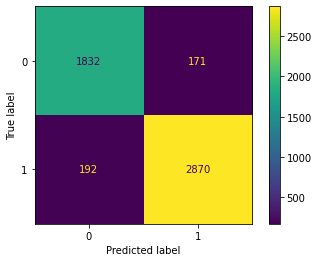

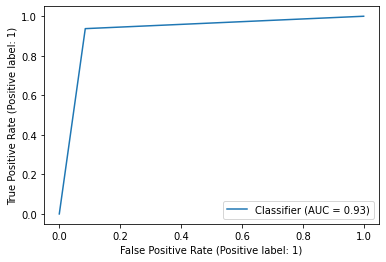

In [84]:
print("###Random Forest Classifier###\n")
print("Accuracy: " + str(round(mean(acc_score_rf), 4)) + " +- "+ str(round(std(acc_score_rf),4)))
print("ROC-AUC: " + str(round(mean(auc_score_rf),4)) + " +- " + str(round(std(auc_score_rf), 4)))
print("F1-Score: " + str(round(mean(f1_rf), 4)) +" +- "+ str(round(std(f1_rf),4)))

yhat = rf.predict(X_test)
print(classification_report(y_test, yhat))
cm = confusion_matrix(yhat, y_test, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
RocCurveDisplay.from_predictions(yhat, y_test)
plt.show()

In [85]:
gc.collect()

6186

In [86]:
######### LightGBM model ###########

In [87]:
lgb = LGBMClassifier(
                boosting_type='gbdt',
                max_depth=10,
                learning_rate=0.05,
                n_estimators=450,
                objective = 'binary',
                random_state=42
)

In [88]:
kf = KFold(n_splits=n_fold, shuffle = False)
acc_score_lgb = []
auc_score_lgb = []
f1_lgb = []
meta_train_lgb = []
meta_test_lgb = []
i = 1
for train_index, valid_index in kf.split(X_train, y_train):
    print('KFold {} of {}'.format(i,kf.n_splits))
    train_X, val_X = X_train.iloc[train_index], X_train.iloc[valid_index]
    train_y, val_y = y_train.iloc[train_index], y_train.iloc[valid_index]
    lgb.fit(train_X, train_y, eval_set=[(val_X, val_y)], early_stopping_rounds=200, verbose = 0)
    ####meta
    meta_train_lgb = np.append(meta_train_lgb, lgb.predict_proba(val_X)[:,1]).reshape(-1,1)
    
    if len(meta_test_lgb) == 0:
        meta_test_lgb = lgb.predict_proba(X_test)[:,1].reshape(-1,1)
    else:
        meta_test_lgb = np.add(meta_test_lgb, lgb.predict_proba(X_test)[:,1].reshape(-1,1))
    #####
    yhat = lgb.predict(X_test)
    acc_score_lgb.append(accuracy_score(yhat,y_test))
    auc_score_lgb.append(roc_auc_score(yhat,y_test))
    f1_lgb.append(f1_score(yhat,y_test))
    i += 1
meta_test_lgb = np.divide(meta_test_lgb, n_fold)

KFold 1 of 5


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KFold 2 of 5


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KFold 3 of 5


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KFold 4 of 5


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KFold 5 of 5


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


###LightGBM Classifier###

Accuracy: 0.9253 +- 0.0017
ROC-AUC: 0.9195 +- 0.0017
F1-Score: 0.9362 +- 0.0014
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2024
           1       0.96      0.91      0.94      3041

    accuracy                           0.92      5065
   macro avg       0.92      0.93      0.92      5065
weighted avg       0.93      0.92      0.92      5065



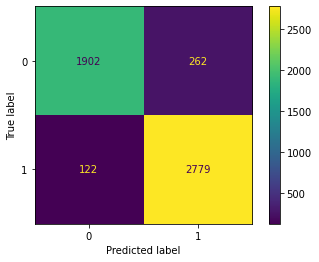

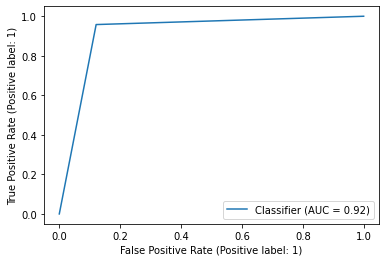

In [89]:
print("###LightGBM Classifier###\n")
print("Accuracy: " + str(round(mean(acc_score_lgb),4)) + " +- "+ str(round(std(acc_score_lgb),4)))
print("ROC-AUC: " + str(round(mean(auc_score_lgb), 4)) + " +- " + str(round(std(auc_score_lgb), 4)))
print("F1-Score: " + str(round(mean(f1_lgb), 4)) +" +- "+ str(round(std(f1_lgb),4)))

yhat = lgb.predict(X_test)
print(classification_report(y_test, yhat))
cm = confusion_matrix(yhat, y_test, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
RocCurveDisplay.from_predictions(yhat, y_test)
plt.show()

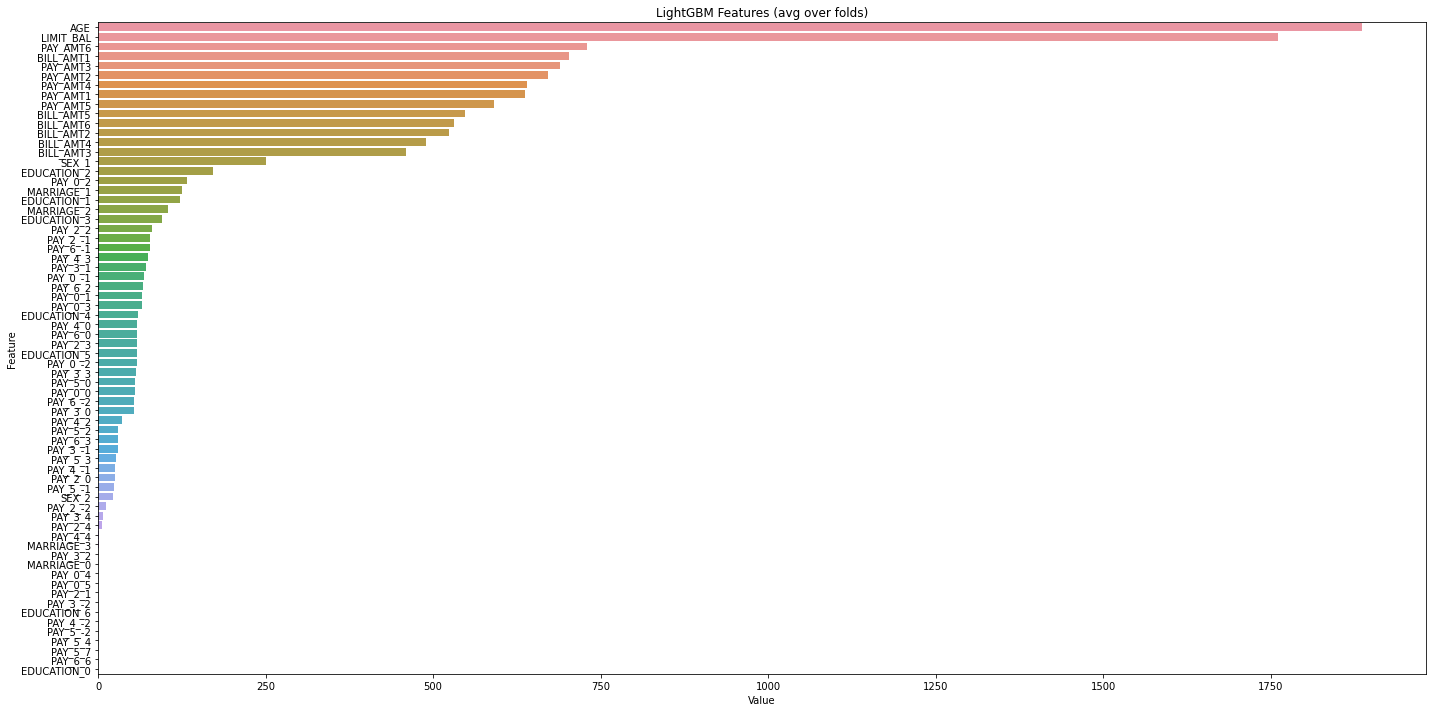

In [90]:
# feature_importances
feature_imp = pd.DataFrame(sorted(zip(lgb.feature_importances_,X.columns)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

In [91]:
gc.collect()

21790

In [92]:
######## XGBoost model ##########

In [93]:
xgb  = XGBClassifier(
 learning_rate =0.05,
 n_estimators=410,
 max_depth=18,
 min_child_weight=4,
 subsample=0.5,
 objective= 'binary:logistic',
 random_state=42)

In [94]:
kf = KFold(n_splits=n_fold, shuffle = False)
acc_score_xgb = []
auc_score_xgb = []
f1_xgb = []
meta_train_xgb = []
meta_test_xgb = []
i = 1
for train_index, valid_index in kf.split(X_train, y_train):
    print('KFold {} of {}'.format(i,kf.n_splits))
    train_X, val_X = X_train.iloc[train_index], X_train.iloc[valid_index]
    train_y, val_y = y_train.iloc[train_index], y_train.iloc[valid_index]
    xgb.fit(train_X, train_y, eval_set=[(val_X, val_y)], early_stopping_rounds=200, verbose = 0)
    ####meta
    meta_train_xgb = np.append(meta_train_xgb, xgb.predict_proba(val_X)[:,1]).reshape(-1,1)
    
    if len(meta_test_xgb) == 0:
        meta_test_xgb = xgb.predict_proba(X_test)[:,1].reshape(-1,1)
    else:
        meta_test_xgb = np.add(meta_test_xgb, xgb.predict_proba(X_test)[:,1].reshape(-1,1))
    #####
    yhat = xgb.predict(X_test)
    acc_score_xgb.append(accuracy_score(yhat,y_test))
    auc_score_xgb.append(roc_auc_score(yhat,y_test))
    f1_xgb.append(f1_score(yhat,y_test))
    i += 1
meta_test_xgb = np.divide(meta_test_xgb, n_fold)

KFold 1 of 5


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KFold 2 of 5


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KFold 3 of 5


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KFold 4 of 5


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KFold 5 of 5


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


###XGBoost Classifier###

Accuracy: 0.9301 +- 0.0027
ROC-AUC: 0.9256 +- 0.0027
F1-Score: 0.9412 +- 0.0022
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2024
           1       0.95      0.93      0.94      3041

    accuracy                           0.93      5065
   macro avg       0.92      0.92      0.92      5065
weighted avg       0.93      0.93      0.93      5065



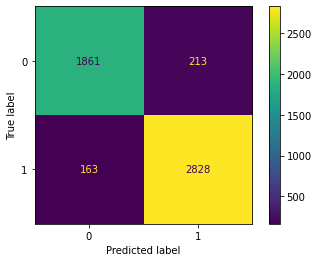

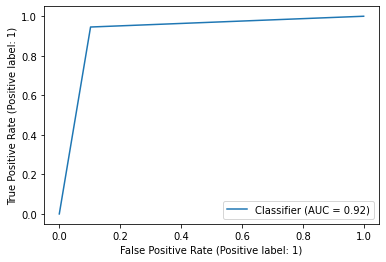

In [95]:
print("###XGBoost Classifier###\n")
print("Accuracy: " + str(round(mean(acc_score_xgb), 4)) + " +- "+ str(round(std(acc_score_xgb),4)))
print("ROC-AUC: " + str(round(mean(auc_score_xgb),4)) + " +- " + str(round(std(auc_score_xgb),4)))
print("F1-Score: " + str(round(mean(f1_xgb),4)) +" +- "+ str(round(std(f1_xgb),4)))

yhat = xgb.predict(X_test)
print(classification_report(y_test, yhat))
cm = confusion_matrix(yhat, y_test, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
RocCurveDisplay.from_predictions(yhat, y_test)
plt.show()

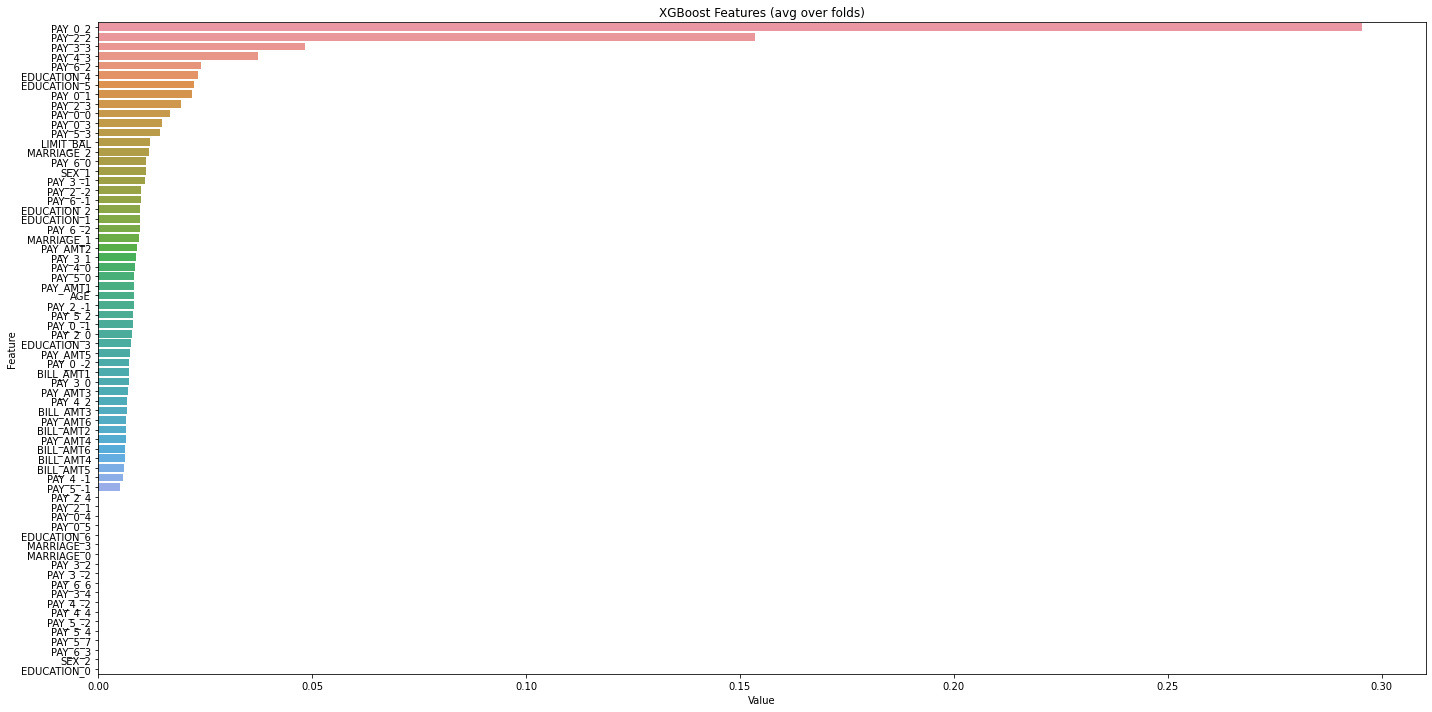

In [96]:
# feature_importances
feature_imp = pd.DataFrame(sorted(zip(xgb.feature_importances_,X.columns)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('XGBoost Features (avg over folds)')
plt.tight_layout()
plt.show()

In [97]:
gc.collect()

21725

In [98]:
############ CatBoost ################

In [99]:
catb = CatBoostClassifier(iterations=450,
                           learning_rate=0.05,
                           depth=10)

In [100]:
kf = KFold(n_splits=n_fold, shuffle = False)
acc_score_catb = []
auc_score_catb = []
f1_catb = []
meta_train_catb = []
meta_test_catb = []
i = 1
for train_index, valid_index in kf.split(X_train, y_train):
    print('KFold {} of {}'.format(i,kf.n_splits))
    train_X, val_X = X_train.iloc[train_index], X_train.iloc[valid_index]
    train_y, val_y = y_train.iloc[train_index], y_train.iloc[valid_index]
    catb.fit(train_X, train_y, eval_set=[(val_X, val_y)], early_stopping_rounds=200, verbose = 0)
    ####meta
    meta_train_catb = np.append(meta_train_catb, catb.predict_proba(val_X)[:,1]).reshape(-1,1)
    
    if len(meta_test_catb) == 0:
        meta_test_catb = catb.predict_proba(X_test)[:,1].reshape(-1,1)
    else:
        meta_test_catb = np.add(meta_test_catb, catb.predict_proba(X_test)[:,1].reshape(-1,1))
    #####
    yhat = catb.predict(X_test)
    acc_score_catb.append(accuracy_score(yhat,y_test))
    auc_score_catb.append(roc_auc_score(yhat,y_test))
    f1_catb.append(f1_score(yhat,y_test))
    i += 1
meta_test_catb = np.divide(meta_test_catb, n_fold)

KFold 1 of 5
KFold 2 of 5
KFold 3 of 5
KFold 4 of 5
KFold 5 of 5


###Catboost Classifier###

Accuracy: 0.9369 +- 0.0008
ROC-AUC: 0.9323 +- 0.0008
F1-Score: 0.9467 +- 0.0006
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2024
           1       0.96      0.93      0.95      3041

    accuracy                           0.94      5065
   macro avg       0.93      0.94      0.93      5065
weighted avg       0.94      0.94      0.94      5065



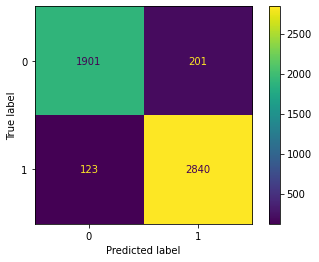

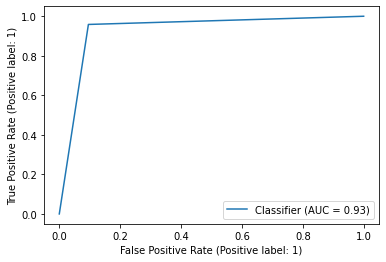

In [101]:
print("###Catboost Classifier###\n")
print("Accuracy: " + str(round(mean(acc_score_catb),4)) + " +- "+ str(round(std(acc_score_catb),4)))
print("ROC-AUC: " + str(round(mean(auc_score_catb),4)) + " +- " + str(round(std(auc_score_catb),4)))
print("F1-Score: " + str(round(mean(f1_catb),4)) +" +- "+ str(round(std(f1_catb),4)))

yhat = catb.predict(X_test)
print(classification_report(y_test, yhat))
cm = confusion_matrix(yhat, y_test, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
RocCurveDisplay.from_predictions(yhat, y_test)
plt.show()

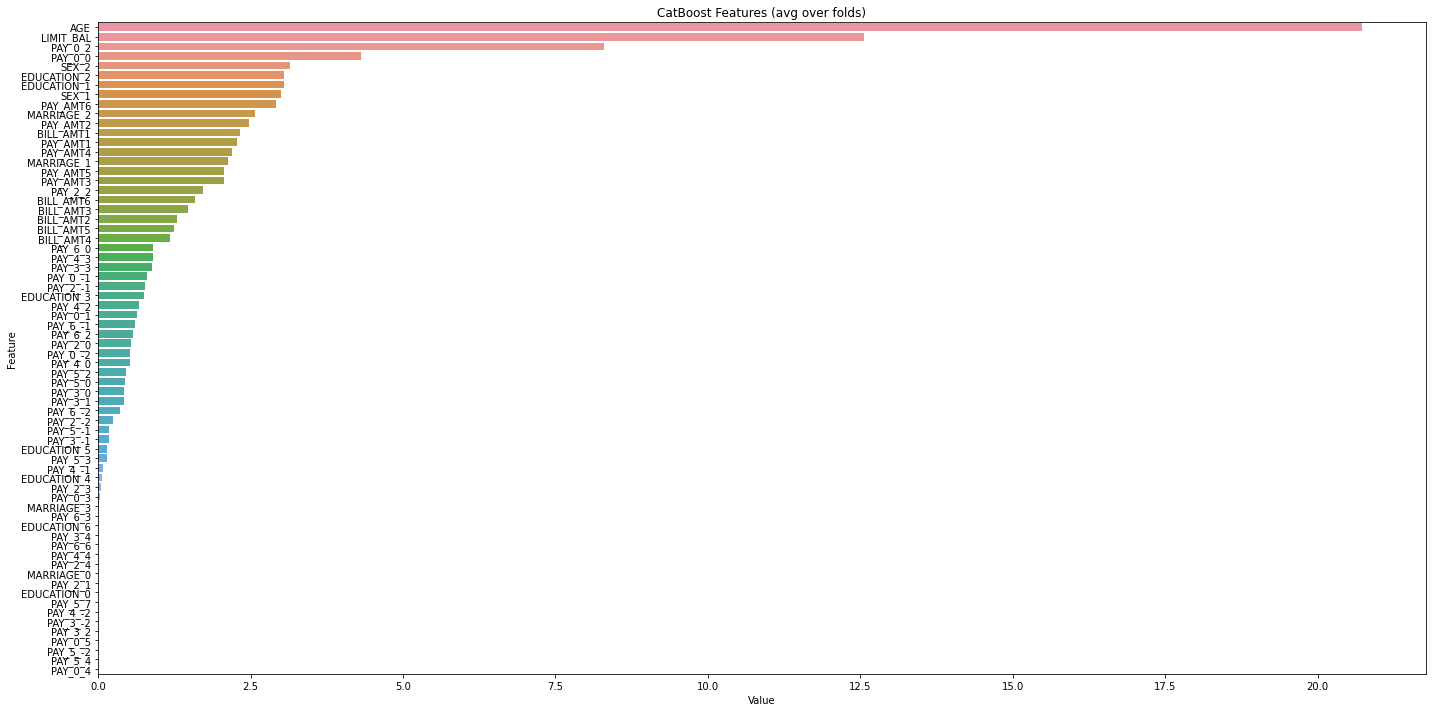

In [102]:
# feature_importances
feature_imp = pd.DataFrame(sorted(zip(catb.feature_importances_,X.columns)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('CatBoost Features (avg over folds)')
plt.tight_layout()
plt.show()

In [103]:
gc.collect()

21838

In [104]:
######### GBDT #############

In [105]:
gbdt = GradientBoostingClassifier(n_estimators=438,
                                  learning_rate=0.06,
                                  max_depth=10,
                                  subsample = 0.55,
                                  verbose = 1,
                                  random_state=0)

In [106]:
kf = KFold(n_splits=n_fold, shuffle = False)
acc_score_gbdt = []
auc_score_gbdt = []
f1_gbdt = []
meta_train_gbdt = []
meta_test_gbdt = []
i = 1
for train_index, valid_index in kf.split(X_train, y_train):
    print('KFold {} of {}'.format(i,kf.n_splits))
    train_X, val_X = X_train.iloc[train_index], X_train.iloc[valid_index]
    train_y, val_y = y_train.iloc[train_index], y_train.iloc[valid_index]
    gbdt.fit(train_X, train_y)
    ####meta
    meta_train_gbdt = np.append(meta_train_gbdt, gbdt.predict_proba(val_X)[:,1]).reshape(-1,1)
    
    if len(meta_test_gbdt) == 0:
        meta_test_gbdt = gbdt.predict_proba(X_test)[:,1].reshape(-1,1)
    else:
        meta_test_gbdt = np.add(meta_test_gbdt, gbdt.predict_proba(X_test)[:,1].reshape(-1,1))
    #####
    yhat = gbdt.predict(X_test)
    acc_score_gbdt.append(accuracy_score(yhat,y_test))
    auc_score_gbdt.append(roc_auc_score(yhat,y_test))
    f1_gbdt.append(f1_score(yhat,y_test))
    i += 1
meta_test_gbdt = np.divide(meta_test_gbdt, n_fold)

KFold 1 of 5
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.2892           0.0478           59.79s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


         2           1.2434           0.0427            1.01m
         3           1.2020           0.0361           58.98s
         4           1.1582           0.0336           58.23s
         5           1.1255           0.0322           57.56s
         6           1.0880           0.0293           57.15s
         7           1.0490           0.0294           56.87s
         8           1.0205           0.0278           56.71s
         9           0.9947           0.0224           56.66s
        10           0.9700           0.0256           56.38s
        20           0.7651           0.0121           55.11s
        30           0.6119           0.0110           53.81s
        40           0.5296           0.0049           52.74s
        50           0.4590           0.0032           51.73s
        60           0.4058           0.0037           50.55s
        70           0.3655           0.0011           49.34s
        80           0.3357           0.0008           48.28s
        

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


         2           1.2405           0.0421           54.49s
         3           1.1981           0.0382           54.65s
         4           1.1552           0.0341           54.88s
         5           1.1169           0.0320           55.03s
         6           1.0777           0.0305           55.04s
         7           1.0415           0.0288           55.22s
         8           1.0135           0.0272           55.51s
         9           0.9882           0.0218           55.42s
        10           0.9676           0.0212           55.34s
        20           0.7497           0.0111           54.12s
        30           0.6137           0.0086           53.13s
        40           0.5273           0.0056           52.16s
        50           0.4579           0.0024           51.09s
        60           0.3993           0.0022           50.10s
        70           0.3633           0.0012           49.06s
        80           0.3273           0.0010           47.92s
        

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


         2           1.2456           0.0388           53.78s
         3           1.2029           0.0359           54.36s
         4           1.1649           0.0344           54.62s
         5           1.1262           0.0323           54.78s
         6           1.0940           0.0289           54.92s
         7           1.0540           0.0319           55.34s
         8           1.0278           0.0262           55.21s
         9           1.0007           0.0229           55.21s
        10           0.9726           0.0212           55.17s
        20           0.7580           0.0124           54.15s
        30           0.6189           0.0085           53.14s
        40           0.5294           0.0046           52.01s
        50           0.4569           0.0022           51.01s
        60           0.3994           0.0022           49.85s
        70           0.3580           0.0028           48.76s
        80           0.3243           0.0016           47.62s
        

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


         2           1.2401           0.0417           56.66s
         3           1.1994           0.0354           56.23s
         4           1.1585           0.0386           56.14s
         5           1.1151           0.0349           56.29s
         6           1.0785           0.0294           56.13s
         7           1.0450           0.0292           56.11s
         8           1.0200           0.0271           56.22s
         9           0.9893           0.0219           55.99s
        10           0.9631           0.0200           55.80s
        20           0.7406           0.0149           54.60s
        30           0.5991           0.0077           53.54s
        40           0.5179           0.0050           52.38s
        50           0.4571           0.0028           51.25s
        60           0.3952           0.0019           50.11s
        70           0.3529           0.0028           49.10s
        80           0.3226           0.0027           47.96s
        

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


         2           1.2392           0.0437           52.74s
         3           1.1873           0.0424           53.69s
         4           1.1516           0.0342           54.41s
         5           1.1075           0.0334           54.65s
         6           1.0794           0.0291           54.78s
         7           1.0403           0.0307           54.80s
         8           1.0126           0.0266           54.85s
         9           0.9877           0.0216           54.73s
        10           0.9608           0.0200           54.66s
        20           0.7610           0.0115           53.77s
        30           0.6084           0.0090           53.06s
        40           0.5120           0.0054           54.10s
        50           0.4459           0.0045           52.65s
        60           0.3921           0.0021           51.32s
        70           0.3558           0.0015           49.98s
        80           0.3291           0.0016           48.72s
        

###GBDT Classifier###

Accuracy: 0.9376 +- 0.0022
ROC-AUC: 0.9329 +- 0.0022
F1-Score: 0.9473 +- 0.0018
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      2024
           1       0.96      0.93      0.95      3041

    accuracy                           0.94      5065
   macro avg       0.93      0.94      0.93      5065
weighted avg       0.94      0.94      0.94      5065



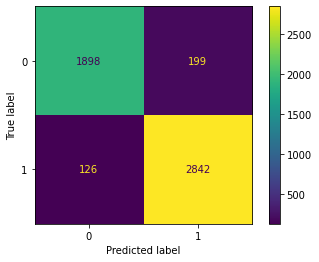

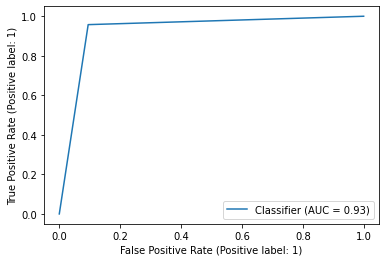

In [107]:
print("###GBDT Classifier###\n")
print("Accuracy: " + str(round(mean(acc_score_gbdt),4)) + " +- "+ str(round(std(acc_score_gbdt),4)))
print("ROC-AUC: " + str(round(mean(auc_score_gbdt),4)) + " +- " + str(round(std(auc_score_gbdt),4)))
print("F1-Score: " + str(round(mean(f1_gbdt),4)) +" +- "+ str(round(std(f1_gbdt),4)))

yhat = gbdt.predict(X_test)
print(classification_report(y_test, yhat))
cm = confusion_matrix(yhat, y_test, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
RocCurveDisplay.from_predictions(yhat, y_test)
plt.show()

In [108]:
gc.collect()

6186

In [109]:
"""
meta_train = pd.concat([ pd.DataFrame(X_train, columns=X_train.columns).reset_index(drop=True),
                          pd.DataFrame(meta_train_rf, columns=['RF']),
                          pd.DataFrame(meta_train_lgb, columns=['LightGBM']),                        
                       pd.DataFrame(meta_train_xgb, columns=['XGBoost']),
                     pd.DataFrame(meta_train_catb, columns=['CatBoost']),
                        pd.DataFrame(meta_train_gbdt, columns=['GBDT'])
                       ], axis = 1)
"""

"\nmeta_train = pd.concat([ pd.DataFrame(X_train, columns=X_train.columns).reset_index(drop=True),\n                          pd.DataFrame(meta_train_rf, columns=['RF']),\n                          pd.DataFrame(meta_train_lgb, columns=['LightGBM']),                        \n                       pd.DataFrame(meta_train_xgb, columns=['XGBoost']),\n                     pd.DataFrame(meta_train_catb, columns=['CatBoost']),\n                        pd.DataFrame(meta_train_gbdt, columns=['GBDT'])\n                       ], axis = 1)\n"

In [110]:
meta_tree_train = pd.concat([pd.DataFrame(meta_train_rf, columns=['RF']),
                          pd.DataFrame(meta_train_lgb, columns=['LightGBM']),                        
                       pd.DataFrame(meta_train_xgb, columns=['XGBoost']),
                     pd.DataFrame(meta_train_catb, columns=['CatBoost']),
                        pd.DataFrame(meta_train_gbdt, columns=['GBDT'])
                       ], axis = 1)


In [111]:
meta_tree_test = pd.concat([pd.DataFrame(meta_test_rf, columns=['RF']),
                          pd.DataFrame(meta_test_lgb, columns=['LightGBM']),                        
                       pd.DataFrame(meta_test_xgb, columns=['XGBoost']),
                     pd.DataFrame(meta_test_catb, columns=['CatBoost']),
                        pd.DataFrame(meta_test_gbdt, columns=['GBDT'])
                        ], axis = 1)

In [113]:
meta_tree_train.to_pickle('./drive/MyDrive/save/taiwan/meta_train.pkl')
meta_tree_test.to_pickle('./drive/MyDrive/save/taiwan/meta_test.pkl')